# Import libraries

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import shap

/Users/sabha6947/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Importing data

In [2]:

import os
import numpy as np
from PIL import Image

# Define the folder path containing the images
folder_path = "/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map"

# Initialize an empty list to store image arrays
image_list = []

# Iterate through files in the folder
for i in range(1, 11):  # Adjust the range based on the number of images
    filename = f'{i}.png'
    image_path = os.path.join(folder_path, filename)
    print(image_path)
    if os.path.isfile(image_path):
        with Image.open(image_path) as img:
            image_array = np.array(img)
            image_list.append(image_array)

# # Convert the list of image arrays to a single NumPy array
images_array = np.array(image_list)

# Print the shape of the resulting array
print(f"Shape of the images array: {images_array.shape}")

/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/1.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/2.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/3.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/4.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/5.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/6.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/7.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/8.png
/Users/sabha6947

In [3]:

import os
import numpy as np
from PIL import Image
import cv2

# Define the folder path containing the images
folder_path = "/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Data/heat_map"

# Initialize an empty list to store image arrays
image_list = []

# Iterate through files in the folder
for i in range(1, 11):  # Adjust the range based on the number of images
    filename = f'{i}.png'
    image_path = os.path.join(folder_path, filename)
    print(image_path)
    img = cv2.imread(image_path)
    image_array = np.array(img)
    print(image_array)
    image_list.append(image_array)
    

# # Convert the list of image arrays to a single NumPy array
images_array = np.array(image_list)

# Print the shape of the resulting array
print(f"Shape of the images array: {images_array.shape}")

/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Data/heat_map/1.png
[[[ 66  53  61]
  [ 59  46  54]
  [ 66  55  63]
  ...
  [ 96  87 100]
  [ 78  68  84]
  [ 34  24  40]]

 [[ 68  55  63]
  [ 62  49  57]
  [ 58  47  55]
  ...
  [ 85  76  89]
  [ 89  80  93]
  [ 64  55  68]]

 [[ 62  50  56]
  [ 54  42  48]
  [ 58  48  54]
  ...
  [ 82  74  85]
  [ 92  84  95]
  [ 78  70  81]]

 ...

 [[ 12   6   0]
  [ 19  13   2]
  [ 41  35  24]
  ...
  [  4   2   1]
  [  5   3   2]
  [  5   3   2]]

 [[ 16   7   0]
  [ 11   2   0]
  [ 14   8   0]
  ...
  [  4   2   1]
  [  4   2   1]
  [  2   0   0]]

 [[ 16   7   0]
  [ 13   4   0]
  [ 14   8   0]
  ...
  [  4   2   1]
  [  4   2   1]
  [  2   0   0]]]
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Data/heat_map/2.png
[[[ 66  53  61]
  [ 59  46  54]
  [ 66  55  63]
  ...
  [ 96  87 100]
  [ 78  68  84]
  [ 34  24  40]]

 [[ 68  55  63]
  [ 62  49  57]
  [ 58  47  55]
  ...
  [ 85  76  89]
  [ 89  80  93]


In [4]:
# # Initialize an empty list to store image arrays
# image_list = []
# img_1 = cv2.imread("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Data/heat_map/1.png")
# img_2 = cv2.imread("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/2.png")
# img_3 = cv2.imread("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/3.png")
# img_4 = cv2.imread("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/4.png")
# img_5 = cv2.imread("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/5.png")
# img_6 = cv2.imread("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/6.png")
# img_7 = cv2.imread("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/7.png")
# img_8 = cv2.imread("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/8.png")
# img_9 = cv2.imread("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/9.png")
# img_10 = cv2.imread("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/10.png")


In [5]:
import cv2
# Function to crop the original images and reducing its size to 256*256
def crop_and_resize(image):
    roi_x, roi_y, roi_width, roi_height = 000, 200, 2560, 1200
    roi = image[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]
    roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    small_roi = cv2.resize(roi_rgb,(256,256), interpolation=cv2.INTER_LINEAR)
    # red_image.append(roi_rgb)
    return small_roi

In [6]:
import os
import numpy as np
from PIL import Image

# Define the folder path containing the images
folder_path = "/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map"

# Initialize an empty list to store image arrays
image_list = []

# Iterate through files in the folder
for i in range(1, 11):  # Adjust the range based on the number of images
    filename = f'{i}.png'
    image_path = os.path.join(folder_path, filename)
    print(image_path)
    if os.path.isfile(image_path):
        with Image.open(image_path) as img:
            image_array = np.array(img)
            red_img = crop_and_resize(image_array)
            image_list.append(red_img)

# # Convert the list of image arrays to a single NumPy array
images_array = np.array(image_list)

# Print the shape of the resulting array
print(f"Shape of the image array: {images_array.shape}")

/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/1.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/2.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/3.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/4.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/5.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/6.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/7.png
/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/heat_map/8.png
/Users/sabha6947

In [7]:
# reduced_image_list = []
# for j in range(len(images_array)):
#     print(j)
#     reduced_image = crop_and_resize(images_array[j])
#     reduced_image_list.append(reduced_image)

# reduced_image_array = np.array(reduced_image_list)

# print(f"Shape of the reduced images array: {reduced_image_array.shape}")

# Splitting training and test data & Preprocessing

In [21]:
# Reading labeled data
df = pd.read_csv("/Users/sabha6947/Library/CloudStorage/OneDrive-UiTOffice365/Documents/Study courses/NLDL winter school/Data/label.csv")
y = df.to_numpy()
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(images_array, y, test_size= 0.2)


# # Determine the number of pixels
# number_pix = X_train.shape[1] * X_train.shape[2]

# # Reshape the data and convert to float32
# X_train = X_train.reshape(X_train.shape[0], number_pix).astype('float256')
# X_test = X_test.reshape(X_test.shape[0], number_pix).astype('float256')
X_train = X_train.reshape(X_train.shape[0], 256, 256, 3)
X_test = X_test.reshape(X_test.shape[0], 256, 256, 3)

# Normalizing the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [22]:
# # one-hot encoding using keras' numpy-related utilities
# n_classes = 2
# print("Shape before one-hot encoding: ", y_train.shape)
# Y_train = to_categorical(y_train, n_classes)
# Y_test = to_categorical(y_test, n_classes)
# print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (8, 1)
Shape after one-hot encoding:  (8, 2)


# Model architecture

In [78]:
# def plot_loss_vs_epoch(history):
#     plt.figure(figsize=(10, 6))
    
#     # Plot training loss
#     plt.plot(history.history['loss'], label='Train', color='blue')
    
#     # Plot validation loss (which represents the testing dataset)
#     plt.plot(history.history['val_loss'], label='Test', color='orange')
    
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title('CNN_Image: Loss')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


def plot_training_history(history, model):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

    # Plot loss
    ax1.plot(history.history['loss'], label='Train', color='blue')
    ax1.plot(history.history['val_loss'], label='Test', color='orange')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'CNN_Image {model}: Loss')
    ax1.legend()
    ax1.grid(True)
    plt.show()

    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='Train', color='blue')
    ax2.plot(history.history['val_accuracy'], label='Test', color='orange')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'CNN_Image {model}: Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout and display the plot
    # plt.tight_layout()
    plt.show()

In [81]:
def plot_loss_vs_epoch(history, model):
    plt.figure(figsize=(12, 5))
    
    # Plot training loss
    plt.plot(history.history['loss'], label='Train', color='blue')
    
    # Plot validation loss (which represents the testing dataset)
    plt.plot(history.history['val_loss'], label='Test', color='orange')
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'CNN_Image {model}: Loss')
    plt.legend()
    plt.grid(True)
    plt.show()



def plot_accuracy_vs_epoch(history, model):
    plt.figure(figsize=(12, 5))
    
    # Plot training loss
    plt.plot(history.history['accuracy'], label='Train', color='blue')
    
    # Plot validation loss (which represents the testing dataset)
    plt.plot(history.history['val_accuracy'], label='Test', color='orange')
    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'CNN_Image {model}: Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Plotting loss 
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history['loss'], label='Train', color='blue')
ax.plot(history.history['val_loss'], label='Test', color='orange')
ax.legend()
ax.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'CNN_Image {model}: Loss')
plt.show()

# Plotting accuracy 
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x_axis, [1 - x for x in results['validation_0']['error']], label='Train')
ax.plot(x_axis, [1 - x for x in results['validation_1']['error']], label='Test')
ax.legend()
ax.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy')
plt.show()

# Model 1

In [73]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
# Define the model architecture using the functional API
inputs = keras.Input(shape=(256, 256, 3))
model_1 = Sequential()
#Convolution layer 
model_1.add(Conv2D(50, kernel_size=(3,3), activation='relu', input_shape = (256, 256, 3)))
model_1.add(MaxPool2D(pool_size=(2,2)))

# Flatten the output from convolution layer
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
# Output layer
model_1.add(Dense(1, activation='softmax'))

# Compile the model
model_1.compile(
      loss='binary_crossentropy',
      optimizer=keras.optimizers.Adam(),
      metrics=['accuracy']
  )

In [55]:
# import keras
# import tensorflow as tf
# # Define the model architecture using the functional API
# inputs = keras.Input(shape=(256, 256, 3)) 
# x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
# x = keras.layers.MaxPooling2D((2, 2))(x)
# x = keras.layers.Flatten()(x)
# x = keras.layers.Dense(256, activation='relu')(x)
# outputs = keras.layers.Dense(1, activation='softmax')(x)

# # Create the model with the corresponding inputs and outputs
# model_1 = keras.Model(inputs=inputs, outputs=outputs, name="CNN")

# # Compile the model
# model_1.compile(
#       loss='categorical_crossentropy',
#       optimizer=keras.optimizers.Adam(),
#       metrics=['accuracy']
#   )

In [74]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 254, 254, 50)      1400      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 127, 127, 50)      0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 806450)            0         
                                                                 
 dense_31 (Dense)            (None, 256)               206451456 
                                                                 
 dense_32 (Dense)            (None, 1)                 257       
                                                                 
Total params: 206453113 (787.56 MB)
Trainable params: 206453113 (787.56 MB)
Non-trainable params: 0 (0.00 Byte)
_______

In [76]:
history_1 = model_1.fit(X_train, y_train, batch_size=8, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 24.2454 - accuracy: 0.6250 - val_loss: 16.4918 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 17.8198 - accuracy: 0.6250 - val_loss: 5.1934 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 0.2376 - accuracy: 0.6250 - val_loss: 17.2934 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 8.2960 - accuracy: 0.6250 - val_loss: 18.7850 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 8.7964 - accuracy: 0.6250 - val_loss: 13.2616 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 3.8935 - accuracy: 0.6250 - val_loss: 3.5519 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 7.6826e-05 - accuracy: 0.6250 - val_loss: 6.1672 - val_accuracy: 0.5000
Epoch 8/50
1/1 [===============

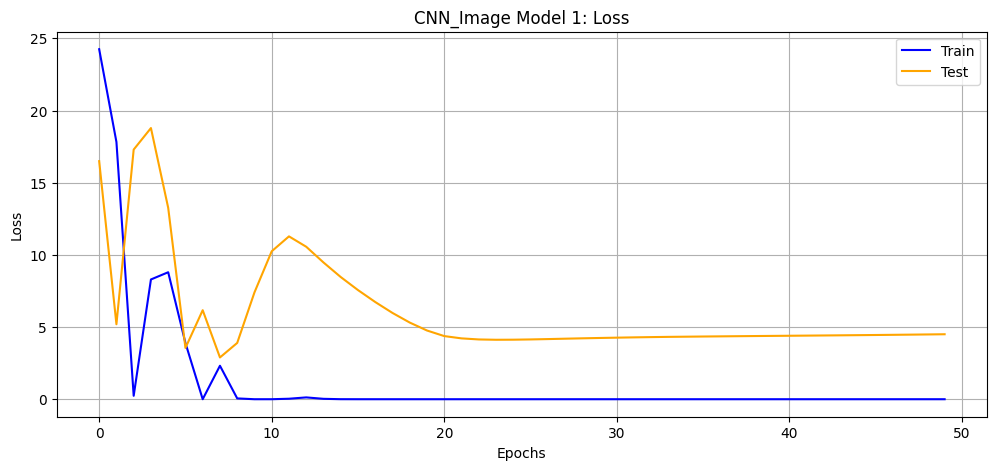

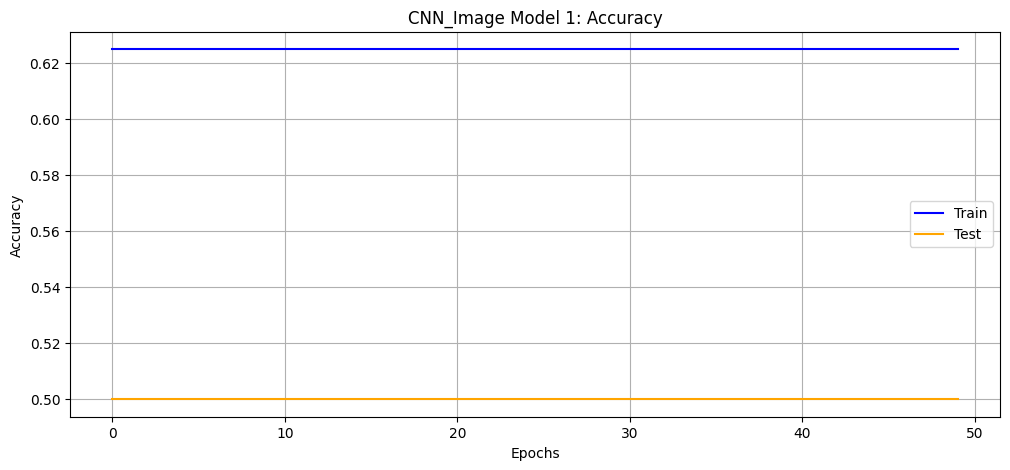

In [82]:
# Plotting
plot_loss_vs_epoch(history_1, 'Model 1')
plot_accuracy_vs_epoch(history_1, 'Model 1')

# Model 2

In [60]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 2
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (8, 1)
Shape after one-hot encoding:  (8, 2)


In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
# building a linear stack of layers with the sequential model
model_2 = Sequential()

# convolutional layer
model_2.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(256, 256, 3)))

# convolutional layer
model_2.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

# flatten output of conv
model_2.add(Flatten())

# hidden layer
model_2.add(Dense(500, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dropout(0.3))
# output layer
model_2.add(Dense(2, activation='softmax'))

# compiling the sequential model
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [ ]:
# shap_values.shape

In [62]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 256, 256, 50)      1400      
                                                                 
 conv2d_21 (Conv2D)          (None, 256, 256, 75)      33825     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 128, 128, 75)      0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 128, 128, 75)      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 125)     84500     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 64, 125)       0         
 ng2D)                                                

In [63]:
# training the model for 10 epochs
history = model_2.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_test, Y_test))
# history = model_2.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.6610 - accuracy: 0.6250 - val_loss: 14.2360 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 17.3250 - accuracy: 0.6250 - val_loss: 8.6143 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 17.1902 - accuracy: 0.3750 - val_loss: 0.7106 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 2.1218 - accuracy: 0.7500 - val_loss: 1.0272 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 1.5386 - accuracy: 0.7500 - val_loss: 0.7617 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.8405 - accuracy: 0.6250 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 1.0434 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/50
1/1 [======================

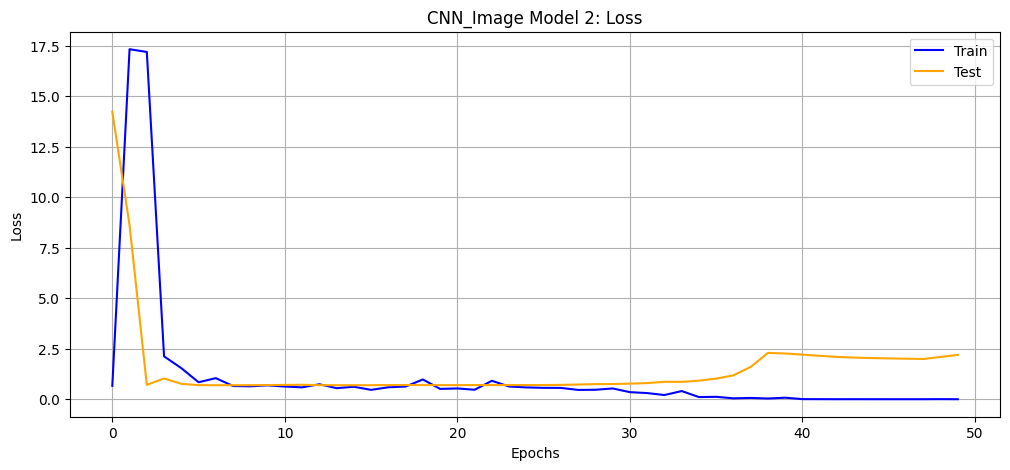

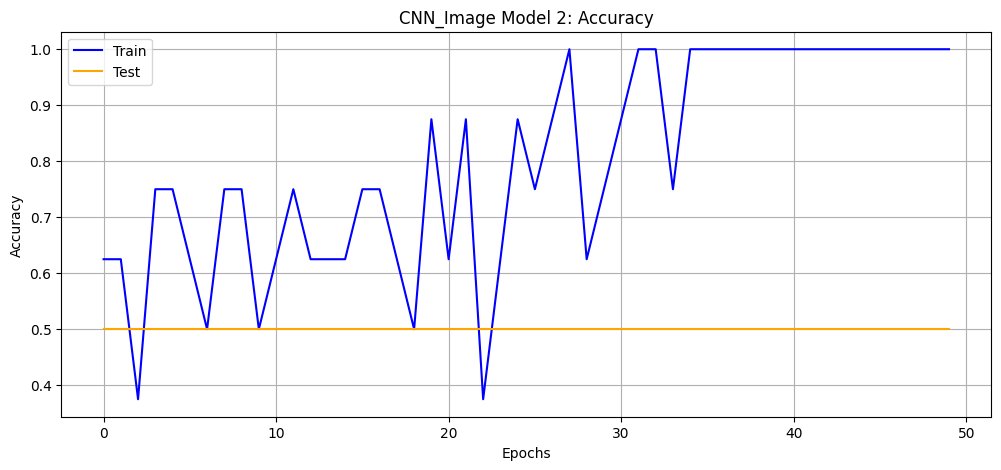

In [84]:
# Plotting
plot_loss_vs_epoch(history, 'Model 2')
plot_accuracy_vs_epoch(history, 'Model 2')

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:35, 35.95s/it]               


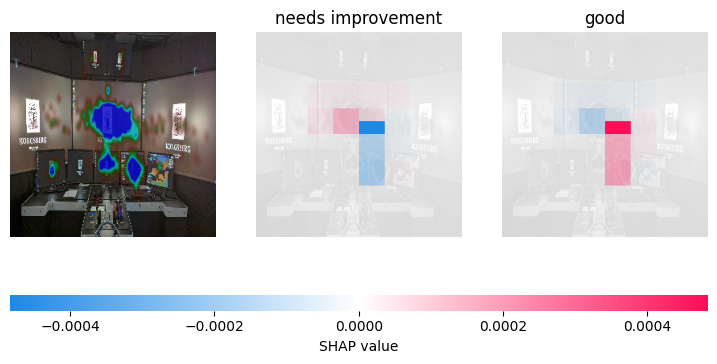

In [85]:
import shap
import shap.maskers
class_names = []
for label in y:
    if label == int(1):
        class_names.append('good')
    else:
        class_names.append('needs improvement')

class_names = class_names[:2]
background = X_train[:]
# masker = shap.maskers.Image("inpaint_telea", images_array[0].shape)
masker = shap.maskers.Image("blur(256,256)", X_train[0].shape)
# explainer = shap.Explainer(model, masker, output_names=class_names)
explainer = shap.Explainer(model_2, masker, output_names=class_names)
test_images = X_test[1:2]
# shap_values = explainer(images_array[:1],max_evals=100, batch_size=50)
shap_values = explainer(test_images, batch_size=32)                                                                                
shap.image_plot(shap_values)

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:27, 27.50s/it]               


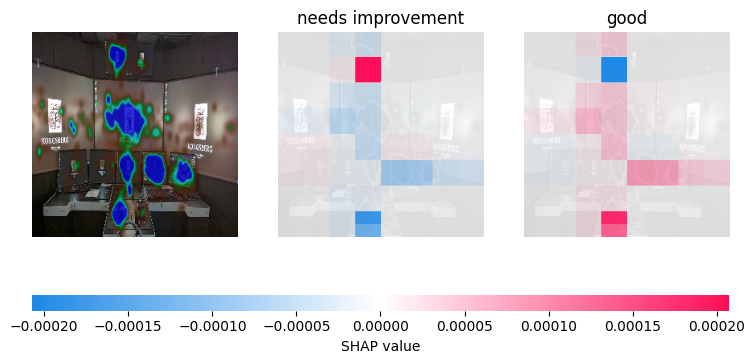

In [86]:
shap_values = explainer(X_test[:1], batch_size=32)                                                                                
shap.image_plot(shap_values)